In [1]:
pip install pandas matplotlib jupyter

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
path = ("C:/Users/NOOR/OneDrive/Desktop/Mart_sales.csv")
df = pd.read_csv(path)
df.head(10)

,ExportID,InvoiceID,ExporterName,City,Port,DestinationCountry,ProductCategory,ProductSubcategory,HSCode,UnitPriceUSD,Quantity,UnitType,TotalValueUSD,ExportDate,ShipmentMode,ContainerNumber,PaymentTerm,TradeTerm,Currency
0,EXP-PK-200000,INV-PK-100000,Sindh Agro Exports,Karachi,Port Qasim,China,Sports Goods,Football,9506,12.49,4754,pcs,59377.46,2023-10-13,Land,NaN,LC (Letter of Credit),FOB,USD
1,EXP-PK-200001,INV-PK-100001,Balochistan Spices Co.,Hyderabad,Port Qasim,USA,Textiles,Cotton Yarn,5205,6.07,299,bales,1814.93,2023-07-11,Sea,PK40495,LC (Letter of Credit),FOB,USD
2,EXP-PK-200002,INV-PK-100002,Northern Fruits Exports,Hyderabad,Port Qasim,China,Surgical,Surgical Instruments,9031,39.64,788,sets,31236.32,2024-07-23,Air,NaN,TT (Telegraphic Transfer),CIF,USD
3,EXP-PK-200003,INV-PK-100003,Lahore Leatherworks,Multan,Multan Airport,UAE,Sports Goods,Football,9506,3.63,4332,pcs,15725.16,2024-11-20,Sea,PK22156,Cash Against Documents,FOB,USD
4,EXP-PK-200004,INV-PK-100004,Lahore Leatherworks,Gwadar,Gwadar Port,Bangladesh,Agriculture,Rice (Basmati),1006,2.00,14190,kg,28380.00,2023-03-30,Land,NaN,Cash Against Documents,FOB,USD
5,EXP-PK-200005,INV-PK-100005,Gwadar Logistics Exports,Lahore,Inland (Landi Kotal),Afghanistan,Agriculture,Rice (Basmati),1006,0.55,19401,kg,10670.55,2025-01-10,Land,NaN,TT (Telegraphic Transfer),FOB,USD
6,EXP-PK-200006,INV-PK-100006,PakTex Exporters Co.,Sialkot,Sialkot Airport,Saudi Arabia,Textiles,Bed Linen,6302,6.79,1069,pcs,7258.51,2024-04-21,Sea,PK59823,Open Account,CIF,USD
7,EXP-PK-200007,INV-PK-100007,Lahore Leatherworks,Faisalabad,Inland (Faisalabad Depot),Germany,Agriculture,Mangoes (fresh),804,0.95,3749,kg,3561.55,2024-03-05,Land,NaN,Open Account,FOB,USD
8,EXP-PK-200008,INV-PK-100008,Balochistan Spices Co.,Faisalabad,Inland (Faisalabad Depot),Afghanistan,Leather Goods,Footwear,6403,43.47,2628,pairs,114239.16,2024-05-16,Sea,PK70589,Cash Against Documents,CIF,USD
9,EXP-PK-200009,INV-PK-100009,Northern Fruits Exports,Sialkot,Sialkot Airport,Germany,Tobacco,Processed Tobacco,2403,2.44,5895,kg,14383.80,2023-04-25,Sea,PK14207,Open Account,CIF,USD


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ExportID            500 non-null    object 
 1   InvoiceID           500 non-null    object 
 2   ExporterName        500 non-null    object 
 3   City                500 non-null    object 
 4   Port                500 non-null    object 
 5   DestinationCountry  500 non-null    object 
 6   ProductCategory     500 non-null    object 
 7   ProductSubcategory  500 non-null    object 
 8   HSCode              500 non-null    int64  
 9   UnitPriceUSD        500 non-null    float64
 10  Quantity            500 non-null    int64  
 11  UnitType            500 non-null    object 
 12  TotalValueUSD       500 non-null    float64
 13  ExportDate          500 non-null    object 
 14  ShipmentMode        500 non-null    object 
 15  ContainerNumber     188 non-null    object 
 16  PaymentT

In [5]:
df.shape

(500, 19)

In [6]:
df.describe()


,HSCode,UnitPriceUSD,Quantity,TotalValueUSD
count,500.000000,500.000000,500.000000,5.000000e+02
mean,4294.244000,34.524100,5069.138000,1.004810e+05
std,2749.155614,77.486774,5321.337025,2.374087e+05
min,306.000000,0.550000,12.000000,1.938000e+01
25%,2403.000000,3.267500,1085.000000,8.213955e+03
50%,4203.000000,7.215000,3251.000000,2.577662e+04
75%,6302.000000,24.232500,6828.500000,7.580583e+04
max,9506.000000,494.270000,19602.000000,2.184459e+06


In [7]:
df.isnull().sum().sum()


np.int64(312)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
print(df.columns.tolist())


['ExportID', 'InvoiceID', 'ExporterName', 'City', 'Port', 'DestinationCountry', 'ProductCategory', 'ProductSubcategory', 'HSCode', 'UnitPriceUSD', 'Quantity', 'UnitType', 'TotalValueUSD', 'ExportDate', 'ShipmentMode', 'ContainerNumber', 'PaymentTerm', 'TradeTerm', 'Currency']


In [10]:
df = df.drop_duplicates()
for c in ["UnitPriceUSD", "Quantity"]:
    df[c] = df[c].fillna(df[c].median())
for c in ["City", "ProductCategory", "ProductSubcategory"]:
    df[c] = df[c].fillna("Unknown")

df["TotalValueUSD"] = (df["Quantity"] * df["UnitPriceUSD"]).round(2)

In [11]:
df["TotalValueUSD"] = (df["Quantity"] * df["UnitPriceUSD"]).round(2)

In [12]:
print("\nTop 5 Exported Products by Value (USD):")
top_products = df.groupby("ProductSubcategory")["TotalValueUSD"].sum().nlargest(5)
display(top_products)

print("\nTop 5 Exporting Cities by Value (USD):")
top_cities = df.groupby("City")["TotalValueUSD"].sum().nlargest(5)
display(top_cities)


Top 5 Exported Products by Value (USD):


ProductSubcategory
Handmade Carpets        23192032.91
Footwear                 7294381.60
Surgical Instruments     5746128.85
Industrial Chemicals     4884100.81
Shrimp (frozen)          2454758.12
Name: TotalValueUSD, dtype: float64


Top 5 Exporting Cities by Value (USD):


City
Peshawar     8790772.24
Hyderabad    8144323.04
Karachi      7306592.56
Gwadar       7281406.52
Lahore       6419808.11
Name: TotalValueUSD, dtype: float64

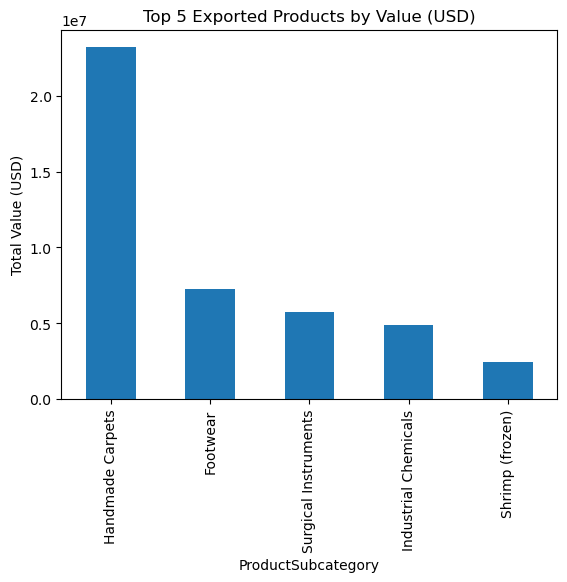

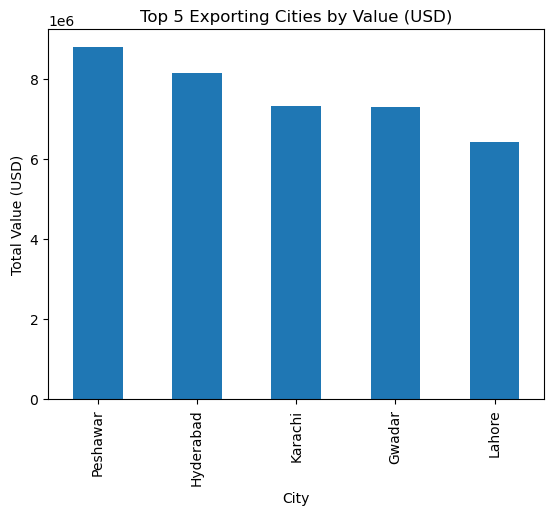

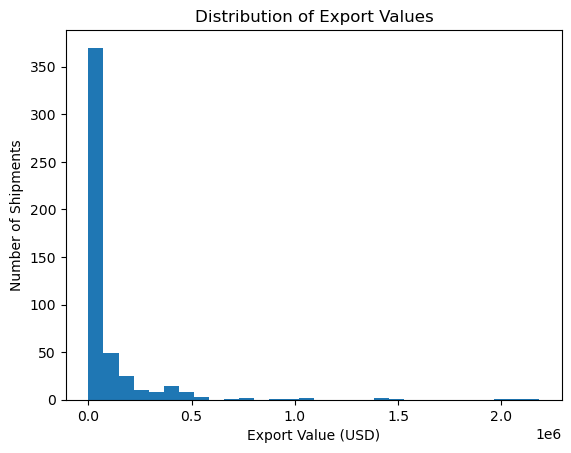

In [13]:

top_products.plot(kind="bar", title="Top 5 Exported Products by Value (USD)")
plt.ylabel("Total Value (USD)")
plt.show()

top_cities.plot(kind="bar", title="Top 5 Exporting Cities by Value (USD)")
plt.ylabel("Total Value (USD)")
plt.show()

plt.hist(df["TotalValueUSD"], bins=30)
plt.title("Distribution of Export Values")
plt.xlabel("Export Value (USD)")
plt.ylabel("Number of Shipments")
plt.show()

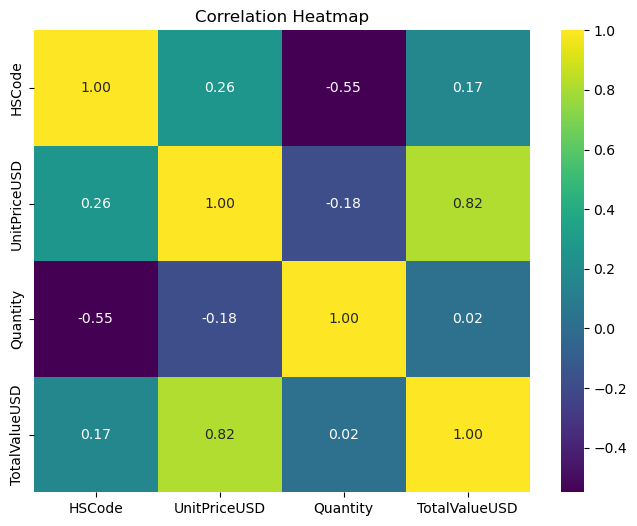

In [15]:
correlation_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


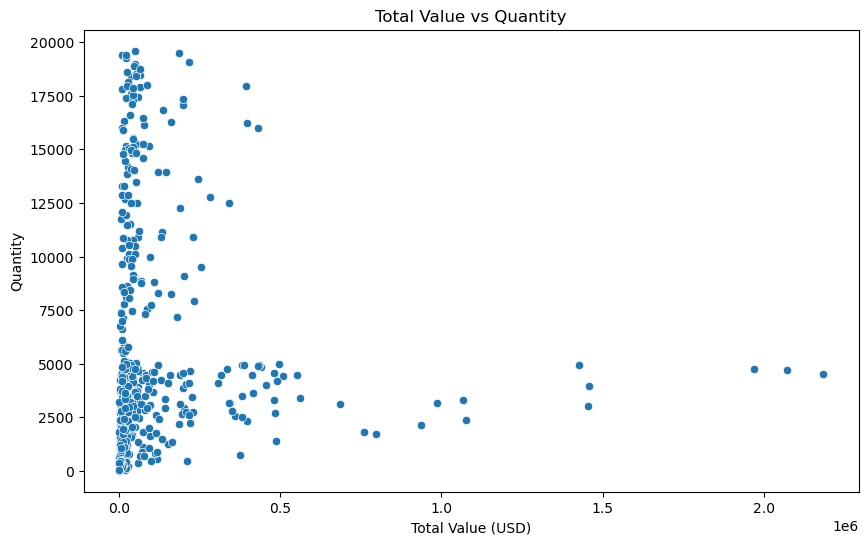

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="TotalValueUSD", y="Quantity", data=df)
plt.title("Total Value vs Quantity")
plt.xlabel("Total Value (USD)")
plt.ylabel("Quantity")
plt.show()
